In [38]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

In [3]:
# 5 classes' name
class_names = ['Among Us', 'Apex Legend', 'Forza Horizon', 'Genshin Impact', 'God of War', 'Minecraft']

In [4]:
# Set image dimensions and the number of classes (for categorical labels)
image_size = (224, 224)
num_classes = 6

In [5]:
def load_images_from_folder(folder_path, image_size):
    images = []
    labels = []
    for class_label, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = Image.open(img_path).convert('RGB')  # Load image and convert to RGB
                img = img.resize(image_size)  # Resize to the desired shape
                img_array = np.array(img)  # Convert image to NumPy array
                images.append(img_array)
                labels.append(class_label)  # Assign labels (assuming folder names represent classes)

    images = np.array(images)
    labels = np.array(labels)
    
    # Normalize pixel values to [0, 1]
    images = images / 255.0
    
    # One-hot encode the labels if using a classification model
    labels = to_categorical(labels, num_classes)
    
    return images, labels

In [6]:
# Set the path to your images folder
folder_path = 'Dataset'

# Load and preprocess images
images, labels = load_images_from_folder(folder_path, image_size)

# Check the shape of the data
print('Images shape:', images.shape)  # Should be (num_images, image_size[0], image_size[1], 3) for RGB images
print('Labels shape:', labels.shape)  # Should be (num_images, num_classes)

Images shape: (3000, 224, 224, 3)
Labels shape: (3000, 6)


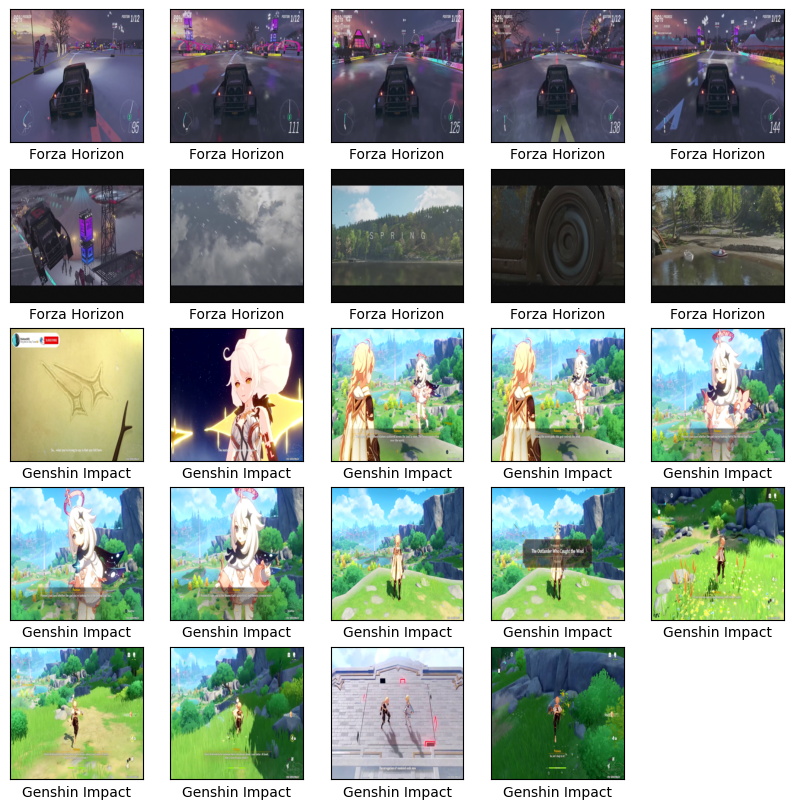

In [21]:
plt.figure(figsize=(10,10))
for i in range(1490, 1514):
    plt.subplot(5,5,i-1490+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(labels[i])])
plt.show()

In [48]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (2400, 224, 224, 3)
Train labels shape: (2400, 6)
Test images shape: (600, 224, 224, 3)
Test labels shape: (600, 6)


In [49]:
# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=(224, 224, 3)), 
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),  # Added another conv layer for deeper learning
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),  # Dropout to prevent overfitting
#         layers.Dense(128, activation="relu"),  # Added a dense layer to learn complex patterns
#         layers.Dense(num_classes, activation="softmax"),  # Output layer for classification
#     ]
# )

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)), 
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  # Dropout to prevent overfitting
        layers.Dense(num_classes, activation="softmax"),  # Output layer for classification
    ]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │     1,119,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,139,142 (4.35 MB)

 Trainable params: 1,139,142 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
batch_size = 32
epochs = 5
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.6339 - loss: 1.4373 - val_accuracy: 0.9792 - val_loss: 0.0671
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - accuracy: 0.9826 - loss: 0.0670 - val_accuracy: 0.9875 - val_loss: 0.0505
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 333ms/step - accuracy: 0.9936 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - accuracy: 0.9901 - loss: 0.0267 - val_accuracy: 0.9792 - val_loss: 0.0386
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.9875 - val_loss: 0.0219


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


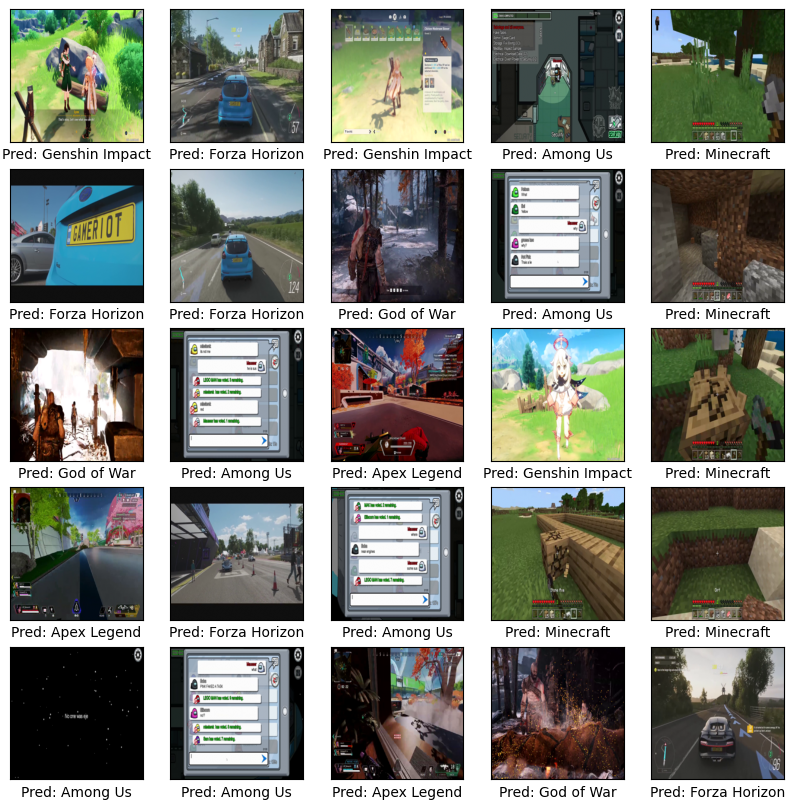

In [52]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test_labels to class indices for comparison
true_classes = np.argmax(test_labels, axis=1)

# Define how many images you want to display
num_images_to_show = 25

plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    # Display the predicted class and the true class
    plt.xlabel(f"Pred: {class_names[predicted_classes[i]]}")
    
plt.show()

Shape of the new image: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


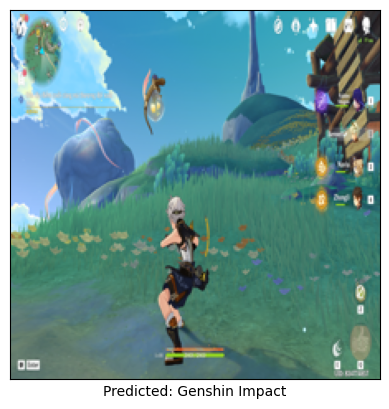

In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')  # Load the image
    img = img.resize((224, 224))  # Resize the image to 224x224
    img_array = np.array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    
    # Ensure the image has the correct shape (1, 224, 224, 3)
    if len(img_array.shape) == 3:
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    return img_array

# Path to the new image
new_image_path = 'images.png'

# Preprocess the image
new_image = load_and_preprocess_image(new_image_path)

# Check the shape of the new image
print(f"Shape of the new image: {new_image.shape}")

# Make a prediction (ensure the input has shape (1, 224, 224, 3))
try:
    prediction = model.predict(new_image)

    # Convert the predicted probabilities to the class index
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and the predicted class
    plt.imshow(np.squeeze(new_image))  # Remove batch dimension
    plt.xticks([])
    plt.yticks([])

    # Assuming `class_names` is a list of class labels
    plt.xlabel(f"Predicted: {class_names[predicted_class[0]]}")
    plt.show()

except Exception as e:
    print(f"Error: {e}")
